**Configure Runtime**

GPU - (graphics processing unit) used to accelerate calculations involving massive amounts of data

Tensorflow - focuses on training and inference of deep neural networks (DNN)

DNN - learning methods based on artificial neural networks


In [ ]:
import zipfile
import os
import shutil
with zipfile.ZipFile('archive.zip','r') as f:
  f.extractall('.')

#to confirm that we can connect to the GPU with tensorflow
DIR = './archive'
import tensorflow as tf
dev_name = tf.test.gpu_device_name()
if dev_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(dev_name))


**Train the model using Xception-ImageNet**



*  **ImageDataGenerator** - ensures that model receives new variations of images at each epoch
*  **load_img** - Loads an image into (Python Image Library) PIL format
*  **backend** - default tensor backend engine
*  **Dropout** - technique used to prevent a model from overfitting
*  **Dense** - the regular deeply connected neural network layer
*  **Flatten** - makes the multidimensional input one-dimensional
*  **GlobalAveragePooling2D** - generate one feature map for each corresponding category
*  **Model** - groups layers into an object with training and inference features.
*  **InceptionResNetV2** is a convolutional neural network that is trained on more than a million images from the ImageNet database
*  **Xception** - an extension of the inception Architecture









In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img 
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,TensorBoard,EarlyStopping
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import numpy as np

training_data_path = '/content/Train'
img_size = (250,500)
num_classes = 7
valid_data_dir = '/content/Test'
batch_size = 6
num_epoch = 15
freeze_layers = 16
learning_rate = 0.0002
drop_out = .2
model = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(250,500,3))
top_layer = model.output
x = GlobalAveragePooling2D()(top_layer)
op = Dense(num_classes, activation='softmax',name = 'softmax')(x)
model_final = Model(inputs = model.input,outputs = op)
for layer in model_final.layers[:freeze_layers]:
  layer_trainable = False

for layer in model_final.layers[freeze_layers:]:
  layer_trainable = False

model_final.compile(optimizer=Adam(lr=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
print(model_final.summary())

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip='True',fill_mode= 'nearest',zoom_range=0.3,width_shift_range=0.3,height_shift_range=0.3, rotation_range=30)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip='True',fill_mode= 'nearest',zoom_range=0.3,width_shift_range=0.3,height_shift_range=0.3, rotation_range=30)

train_batches=train_datagen.flow_from_directory(training_data_path,target_size = img_size,shuffle=True,batch_size=batch_size,class_mode = 'categorical')
valid_batches=train_datagen.flow_from_directory(valid_data_dir,target_size = img_size,shuffle=True,batch_size=batch_size,class_mode = 'categorical')

checkpoint = ModelCheckpoint('Xception_model.h5',monitor='val_accuracy',verbose=0,save_best_only=False,save_weights_only=False,mode="auto")
early = EarlyStopping(monitor='val_accuracy',min_delta=0,patience=10,verbose =1,mode='auto')

model_final.fit_generator(train_batches,steps_per_epoch=np.ceil(len(train_batches)/batch_size),validation_data=valid_batches,validation_steps=np.ceil(len(valid_batches)/batch_size),epochs=num_epoch,callbacks=[checkpoint,early])

class_dic=train_batches.class_indices
class_dic
vals=list(class_dic.values())
keys=list(class_dic.keys())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 249, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 249, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 1.9779 - accuracy: 0.0370

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


5/5 [==============================] - 65s 11s/step - loss: 1.9779 - accuracy: 0.0370 - val_loss: 1.9218 - val_accuracy: 0.0833
Epoch 2/15
5/5 [==============================] - 59s 12s/step - loss: 1.8826 - accuracy: 0.1667 - val_loss: 1.9504 - val_accuracy: 0.2500
Epoch 3/15
5/5 [==============================] - 59s 12s/step - loss: 1.6926 - accuracy: 0.5667 - val_loss: 1.8435 - val_accuracy: 0.3333
Epoch 4/15
5/5 [==============================] - 59s 12s/step - loss: 1.6608 - accuracy: 0.5000 - val_loss: 1.4757 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 59s 12s/step - loss: 1.5587 - accuracy: 0.4667 - val_loss: 1.3581 - val_accuracy: 0.5833
Epoch 6/15
5/5 [==============================] - 59s 12s/step - loss: 1.3075 - accuracy: 0.6667 - val_loss: 1.1811 - val_accuracy: 0.7500
Epoch 7/15
5/5 [==============================] - 54s 11s/step - loss: 1.5219 - accuracy: 0.4444 - val_loss: 1.2555 - val_accuracy: 0.5833
Epoch 8/15
5/5 [======================

Capture Input Picture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

take_photo(filename='image1.jpg', quality=0.8)

<IPython.core.display.Javascript object>

'image1.jpg'

Predict Currency Note

The currency is a 1Hundrednote predicted with confidence 44.23%


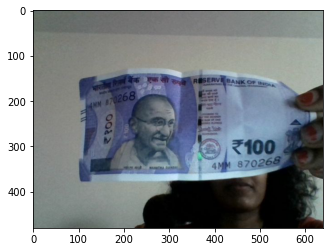

In [ ]:
path = '/content/image1.jpg'
img = plt.imread(path)
plt.imshow(img)

img =image.load_img(path,target_size=img_size)
array=image.img_to_array(img)
test_image=np.expand_dims(array,axis=0)
test_image=preprocess_input(test_image)
prediction=model_final.predict(test_image)
idx=np.argmax(prediction,axis=1)
confidence=prediction[0,idx]*100
digit=keys[vals.index(idx)]
float = confidence[0]
format_float = "{:.2f}".format(float)
print(f'The currency is a {digit} predicted with confidence {format_float}%')
!pip install gTTS
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
tts = gTTS(f'The currency is a {digit} predicted with confidence {format_float} %') #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)